In [50]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import re
from os import walk
def plot_graph(start_seed, end_seed, parent_path, arch_names = ["RNN", "nnRNN", "expRNN", "LSTM"]):
    
    
    line_colors = ["#66a3ff","#33cc33", "#663300", "#660066"]
    shade_colors = ["#b3d1ff","#c2f0c2", "#ffcc99", "#ffccff"]
    random_seeds = np.arange(start_seed,end_seed)
    
    training_losses = {}
    for val in arch_names:
        training_losses[val] = []
        for i in random_seeds:
            path = parent_path+'/copytask/'+val+'/'+str(i)+'/'
#             print("rand seed: ", i)
            for (dirpath, dirnames, filenames) in walk(path):
                
                for file in filenames:
                    if file.endswith("RNN_Train_Losses") or file.endswith("LSTM_Train_Losses"):
#                         print("file: ", file)
                        with open(path+"/"+file, 'rb') as handle:
                            losses = pickle.load(handle)
#                             print(len(losses))
                            training_losses[val].append(losses)
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
    min_losses = {}
#     print(training_losses
    for idx, arch_name in enumerate(arch_names):
#         print(arch_name)
        training_losses_np = np.array(training_losses[arch_name])
#         print(np.array(training_losses[arch_name]))
        print(arch_name, "\tMin loss for 6 evaluation runs: ", np.amin(training_losses_np, axis=1))
#         print(training_losses_np.shape, arch_name)
        means = np.mean(training_losses_np, axis=0)
        std_errors = np.std(training_losses_np, axis=0)/np.sqrt(10*800)
        
        start_std_error = means+std_errors
        end_std_error = means-std_errors
        plt.plot(np.arange(1,801),means,color=line_colors[idx],label=arch_name)
        plt.fill_between(np.arange(1,801),start_std_error,end_std_error, color=shade_colors[idx])

    ax.legend()
    plt.title("Copytask for T=200")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    ax.set(ylim=(0, 1))
    plt.show()
    
    

In [54]:
# arch_names = ["nnRNN", "expRNN", "LSTM","RNN"]
# path2 = './saves/authors-original-code'
# plot_graph(560,561, path2, arch_names)

RNN 	Min loss for 6 evaluation runs:  [0.01195857]
nnRNN 	Min loss for 6 evaluation runs:  [0.07022387]


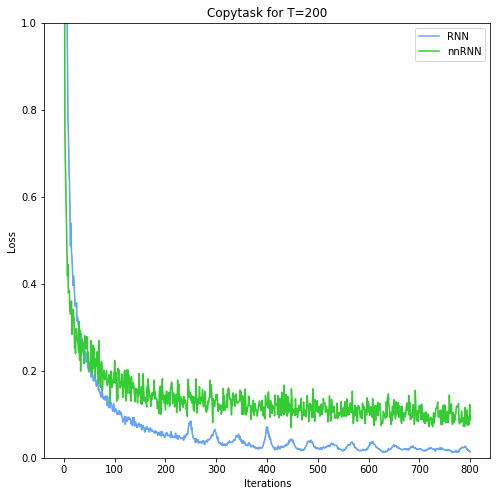

In [37]:
arch_names = ["RNN", "nnRNN"]
path2 = './saves'
plot_graph(802,803, path2, arch_names)

RNN 	Min loss for 6 evaluation runs:  [0.01195857]


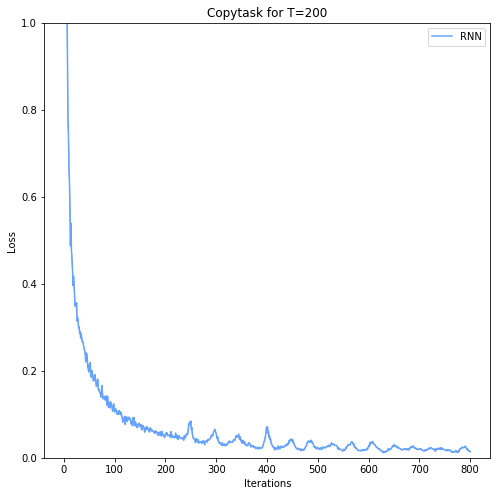

In [38]:
arch_names = ["RNN"]
path2 = './saves'
plot_graph(802,803, path2, arch_names)

nnRNN 	Min loss for 6 evaluation runs:  [0.02350954]


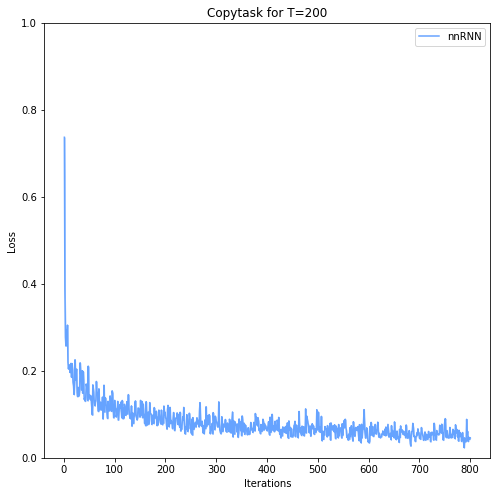

In [39]:
arch_names = ["nnRNN"]
path2 = './saves'
plot_graph(801,802, path2, arch_names)

nnRNN 	Min loss for 6 evaluation runs:  [0.00343811]


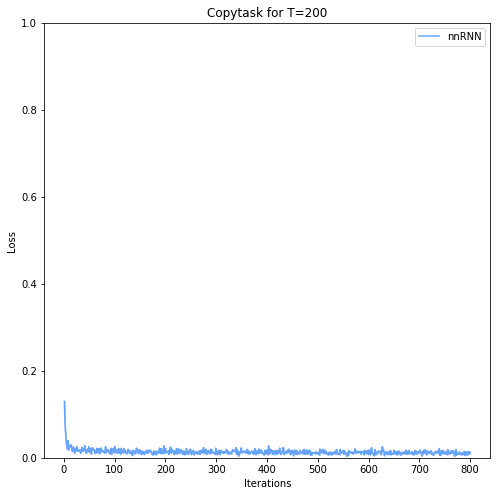

In [40]:
arch_names = ["nnRNN"]
path2 = './saves'
plot_graph(800,801, path2, arch_names)

RNN 	Min loss for 6 evaluation runs:  [0.16489208 0.10693806 0.22997983 0.17910704]
nnRNN 	Min loss for 6 evaluation runs:  [0.00135746 0.00181456 0.00177055]
expRNN 	Min loss for 6 evaluation runs:  [1.06498512e-04 1.04616083e-04 1.18163691e-04 5.64965376e-05]
LSTM 	Min loss for 6 evaluation runs:  [0.09875742 0.10477746 0.10524622 0.10605685]


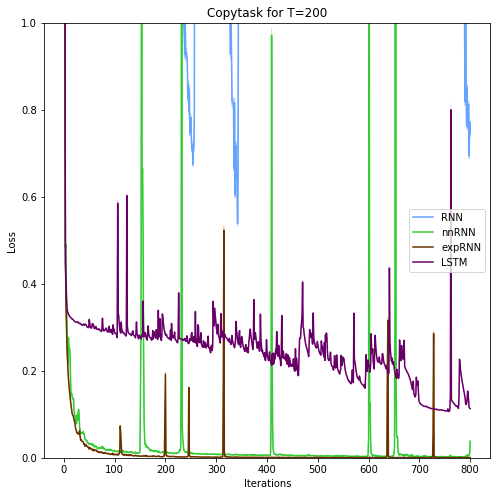

In [41]:
# nhid = 256
arch_names = ["RNN", "nnRNN", "expRNN", "LSTM"]
path2 = './saves/'
plot_graph(60,64, path2, arch_names)

nnRNN 	Min loss for 6 evaluation runs:  [0.0025938  0.00305931 0.00272406 0.00221623 0.00267252 0.0031039 ]


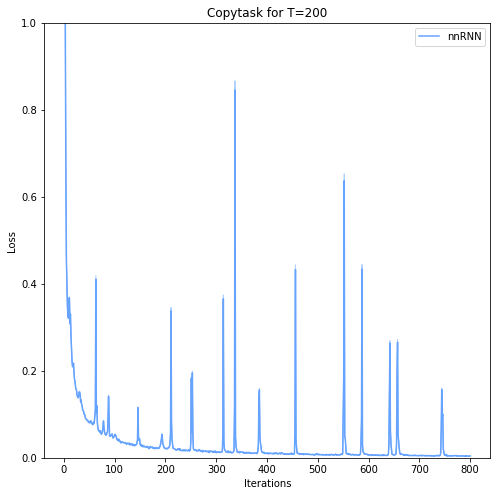

nnRNN 	Min loss for 6 evaluation runs:  [0.00234944 0.0030704  0.00291254 0.00250679 0.00286908 0.00243077]


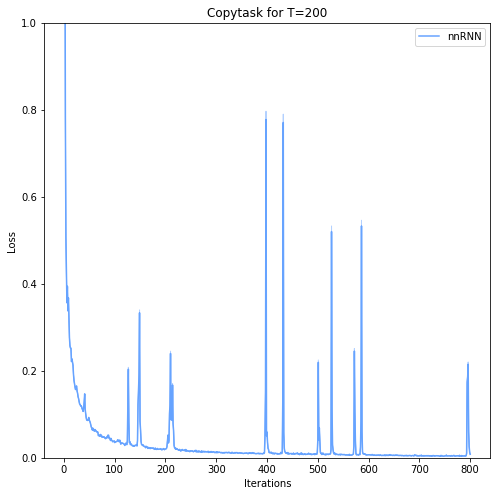

nnRNN 	Min loss for 6 evaluation runs:  [0.00208317 0.00233063 0.00254972 0.00226678 0.00216965 0.00226582]


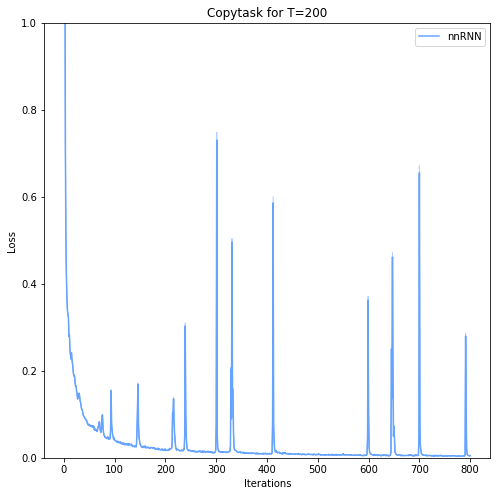

In [42]:
arch_names = ["nnRNN"]
path2 = './saves/nn-rnn-paper-params'
plot_graph(360,366, path2, arch_names)
plot_graph(366,372, path2, arch_names)
plot_graph(372,378, path2, arch_names)

nnRNN 	Min loss for 6 evaluation runs:  [0.00176957 0.00229583 0.00153883 0.00254136 0.00164771 0.00146049]


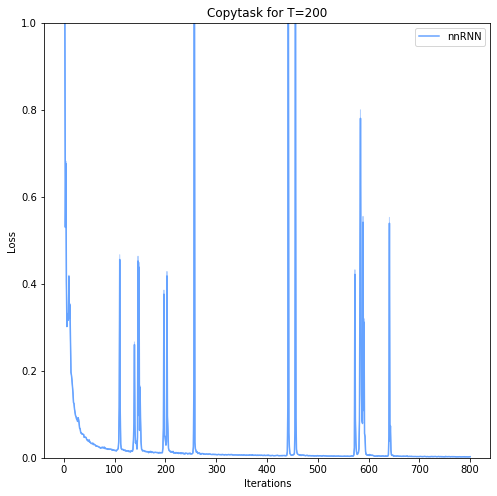

nnRNN 	Min loss for 6 evaluation runs:  [0.00160355 0.00121195 0.0013497  0.0021012  0.002496   0.00172646]


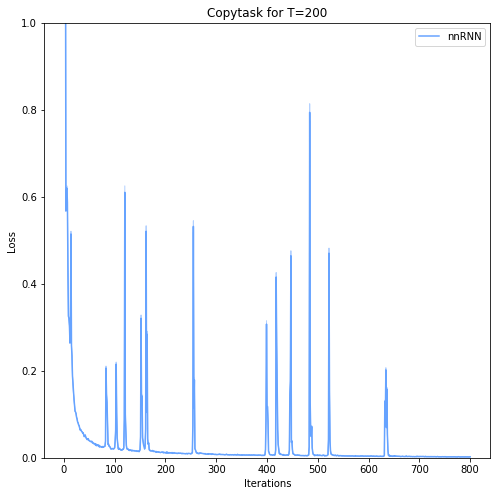

nnRNN 	Min loss for 6 evaluation runs:  [0.00282887 0.00156623 0.00223101 0.00191385 0.00153226 0.001804  ]


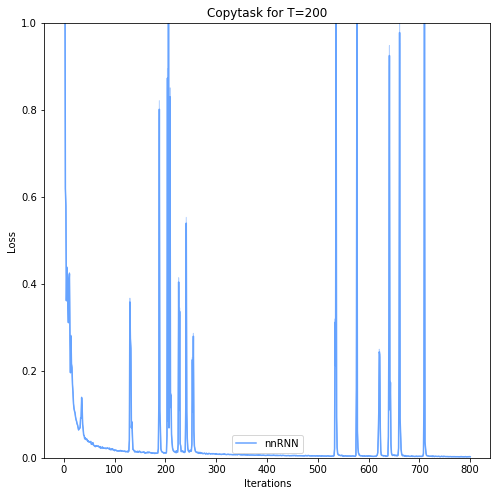

In [43]:
arch_names = ["nnRNN"]
path2 = './saves/saves-l1-loss'
plot_graph(300,306, path2, arch_names)
plot_graph(306,312, path2, arch_names)
plot_graph(312,318, path2, arch_names)

nnRNN 	Min loss for 6 evaluation runs:  [0.00206266 0.00262002 0.00167814 0.00195343 0.00209257 0.00170537]


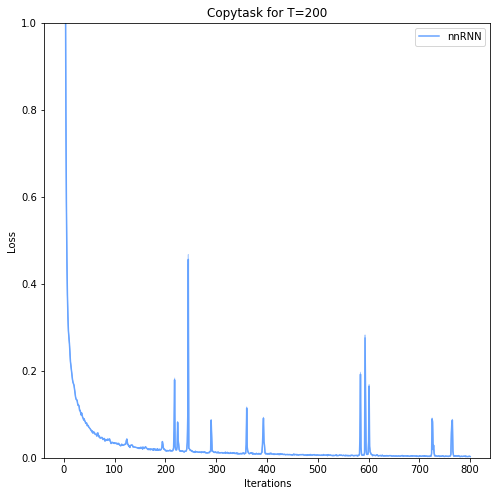

nnRNN 	Min loss for 6 evaluation runs:  [0.0019226  0.00217548 0.00171664 0.00185275 0.00184845 0.00169916]


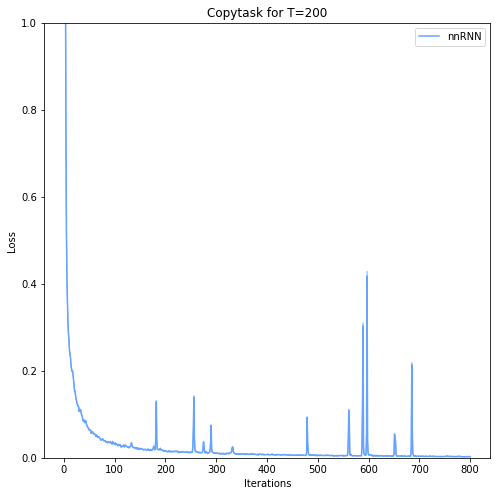

nnRNN 	Min loss for 6 evaluation runs:  [0.00197569 0.00254696 0.00202839 0.00264242 0.00189055 0.00225474]


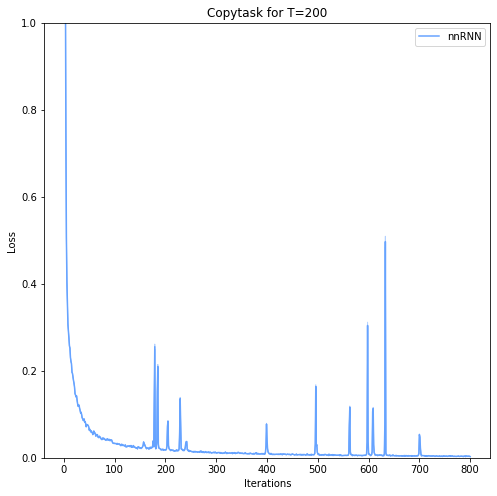

In [44]:
arch_names = ["nnRNN"]
path2 = './saves/saves-gamma-zero-grad'
plot_graph(40,46, path2, arch_names)
plot_graph(46,52, path2, arch_names)
plot_graph(52,58, path2, arch_names)

In [45]:
# arch_names = ["nnRNN"]
# path2 = './saves/saves-adam'
# plot_graph(20,26, path2, arch_names)
# plot_graph(26,32, path2, arch_names)
# plot_graph(32,38, path2, arch_names)

RNN 	Min loss for 6 evaluation runs:  [0.10183726 0.09642754 0.13931277 0.12643945 0.10978118 0.19216652]
nnRNN 	Min loss for 6 evaluation runs:  [0.06590761 0.0358119  0.05236317 0.06791548 0.03705308 0.04107847]
expRNN 	Min loss for 6 evaluation runs:  [0.04338147 0.0453782  0.0429641  0.05178443 0.08753474 0.07701205]
LSTM 	Min loss for 6 evaluation runs:  [0.09430295 0.09474348 0.09458065 0.09418175 0.09565111 0.09475224]


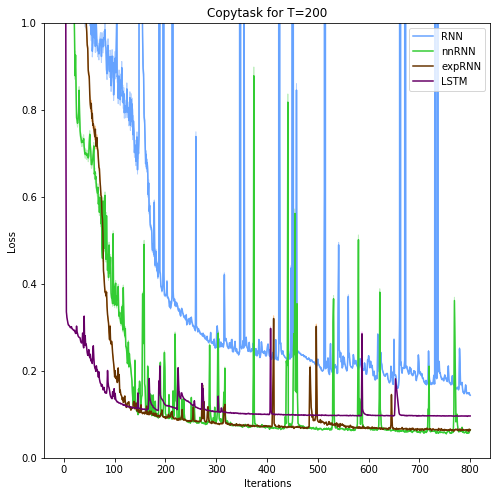

In [46]:
arch_names = ["RNN", "nnRNN", "expRNN", "LSTM"]
path2 = './saves/saves-all-rnns'
plot_graph(0,6, path2, arch_names)

RNN 	Min loss for 6 evaluation runs:  [0.10183726 0.09642754 0.13931277 0.12643945 0.10978118 0.19216652]
nnRNN 	Min loss for 6 evaluation runs:  [0.06590761 0.0358119  0.05236317 0.06791548 0.03705308 0.04107847]
expRNN 	Min loss for 6 evaluation runs:  [0.04338147 0.0453782  0.0429641  0.05178443 0.08753474 0.07701205]
LSTM 	Min loss for 6 evaluation runs:  [0.09430295 0.09474348 0.09458065 0.09418175 0.09565111 0.09475224]


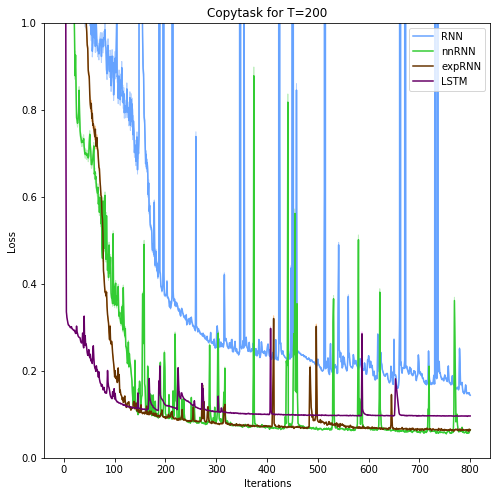

In [47]:
#New plots
arch_names = ["RNN", "nnRNN", "expRNN", "LSTM"]
path2 = './saves/saves-all-rnns'
plot_graph(0,6, path2, arch_names)

nnRNN 	Min loss for 6 evaluation runs:  [0.04345827 0.040894   0.05785261 0.06673161 0.04041864 0.04155604]


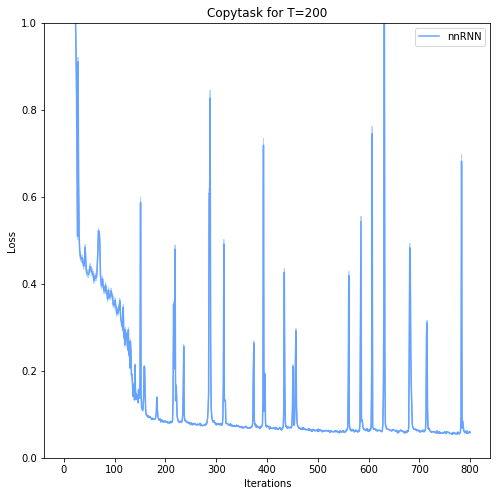

nnRNN 	Min loss for 6 evaluation runs:  [0.04634895 0.04229991 0.04234978 0.03453973 0.04057034 0.0371794 ]


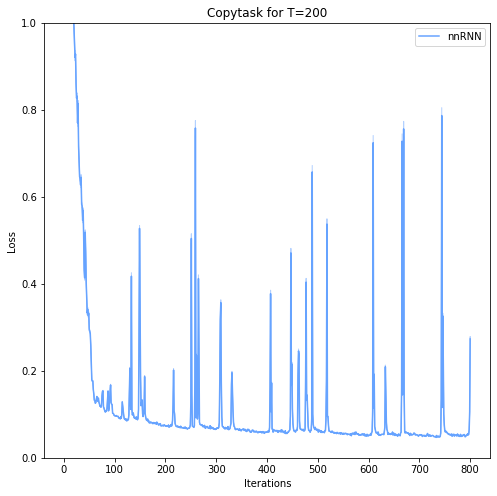

nnRNN 	Min loss for 6 evaluation runs:  [0.0388421  0.04026213 0.03932336 0.04228031 0.04665773 0.07967224]


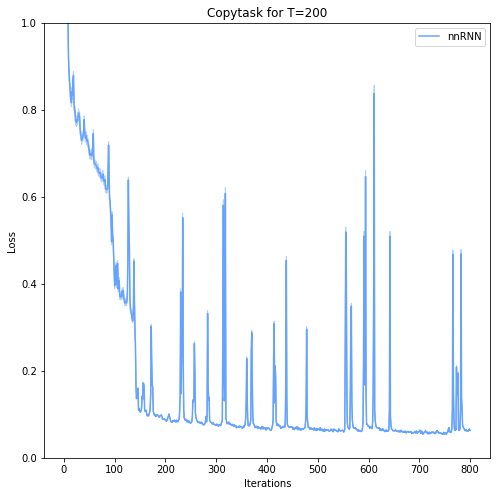

In [48]:
#New plots
arch_names = ["nnRNN"]
path2 = './saves/saves-cayley-and-rand-init'
plot_graph(0,6, path2, arch_names)
plot_graph(6,12, path2, arch_names)
plot_graph(12,18, path2, arch_names)